#Import nessessary libraries

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from keras.models import load_model

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

# Mount your Google Drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Install and load MTCNN

In [3]:
pip install mtcnn

     |████████████████████████████████| 2.3 MB 5.4 MB/s 


In [4]:
import mtcnn

#Load Pre-Trained FaceNet

In [5]:
model_dir = '/content/drive/MyDrive/NP /'
os.chdir(model_dir)
#/content/drive/MyDrive/NP /Cher Eng Lim - facenet_keras.h5
# load the model
model = load_model('Cher Eng Lim - facenet_keras.h5')

#Data preparation

## `convert_to_embedding(face, model)`

We have used this fuction last week. Given a face image, the funcition returns $128$ numbers.

In [6]:
def convert_to_embedding(face, model):

  face = face.astype('float32')
  mean, std = face.mean(), face.std()
  face = (face - mean) / std

  face_expanded = np.expand_dims(face, axis = 0)

  face_embedding = model.predict(face_expanded)

  return face_embedding[0]

In [ ]:
def detect_faces(filename, required_size = (160, 160), save = False, name = ""):

  # read the image
  #image = plt.imread(filename)
  #image = image.convert('RGB') 

  image = Image.open(filename).convert('RGB')
  image = np.asarray(image)

  # detect faces
  faces = global_detector.detect_faces(image)
  plt.imshow(image)

  list_of_face = []
  num_of_face = len(faces)

  for index, face in zip(range(len(faces)), faces):
    
    # extract the top left coner of the detected face
    x, y, width, height = face['box']
    x, y = abs(x), abs(y)

    # extract the face
    extracted_face = image[y: y+height+1, x: x+width+1, :]

    data = Image.fromarray(extracted_face) #convert from np to image 
    data = data.resize(required_size) #resize image

    back_to_np = np.asarray(data) #convert back to np
    # add the numpy array to the list
    list_of_face.append(back_to_np)

    if (save == True):
      filename = name + "_face" + str(index + 1) + ".jpeg"
      data.save(filename)

  return list_of_face

##`load_datatset(directory, model, required_size)`

##Experiment##

In [46]:
from mtcnn.mtcnn import MTCNN

global_detector = MTCNN()

def load_dataset(directory, model, required_size):
  X_list = list()
  y_list = list()

  for subdir in os.listdir(directory):
    folder_path = directory + subdir + '/'
    
    embedding_list = list()
    label_list = list()

    (_, _, filenames) = next(os.walk(folder_path))
    
    for name in filenames:
      face = detect_faces(folder_path + '/' + name, required_size = (160, 160), save = False, name = "")
      face_array = np.asarray(face)
      emd = convert_to_embedding(face_array[0], model)
      X_list.append(emd)
      y_list.append(subdir)

  return X_list, y_list

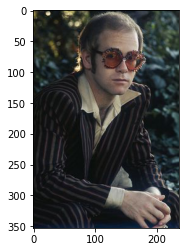

In [50]:
#train_dir = '/content/drive/MyDrive/NP /Cher Eng Lim - Five Celebrity Faces Dataset.zip (Unzipped Files)/Five Celebrity Faces Dataset/train/'
train_dir = '/content/drive/MyDrive/NP /Cher Eng Lim - Five Celebrity Faces Dataset.zip (Unzipped Files)-20220110T132308Z-001.zip (Unzipped Files)/Cher Eng Lim - Five Celebrity Faces Dataset.zip (Unzipped Files)/Five Celebrity Faces Dataset/train/'

X_train_list, y_train_list = load_dataset(train_dir, model ,required_size = (160, 160))

## Training set

In [51]:
print("Type of X_train_list: ", type(X_train_list))
print("Size of X_train_list: ", len(X_train_list))

print("\nType of y_train_list: ", type(y_train_list))
print("Size of y_train_list: ", len(y_train_list))

Type of X_train_list:  <class 'list'>
Size of X_train_list:  92

Type of y_train_list:  <class 'list'>
Size of y_train_list:  92


<font color = "red"> Self-check: you would obtain  </font>

<font color = "red"> `Type of X_train_list:  <class 'list'>`

<font color = "red"> `Size of X_train_list:  92`

<font color = "red"> `Type of y_train_list:  <class 'list'>`

<font color = "red"> `Size of y_train_list:  92`

##Test set

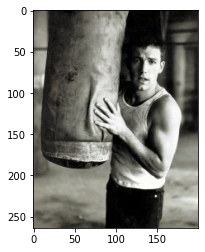

In [47]:
#test_dir = '/content/drive/MyDrive/Cher Eng Lim - Five Celebrity Faces Dataset.zip (Unzipped Files)/Five Celebrity Faces Dataset/test/'
test_dir = '/content/drive/MyDrive/NP /Cher Eng Lim - Five Celebrity Faces Dataset.zip (Unzipped Files)-20220110T132308Z-001.zip (Unzipped Files)/Cher Eng Lim - Five Celebrity Faces Dataset.zip (Unzipped Files)/Five Celebrity Faces Dataset/test/'
X_test_list, y_test_list = load_dataset(test_dir, model, required_size = (160, 160))

In [48]:
print("Type of X_test_list: ", type(X_test_list))
print("Size of X_test_list: ", len(X_test_list))

print("\nType of y_test_list: ", type(y_test_list))
print("Size of y_test_list: ", len(y_test_list))

Type of X_test_list:  <class 'list'>
Size of X_test_list:  25

Type of y_test_list:  <class 'list'>
Size of y_test_list:  25


In [49]:
y_test_list

['madonna',
 'madonna',
 'madonna',
 'madonna',
 'madonna',
 'mindy_kaling',
 'mindy_kaling',
 'mindy_kaling',
 'mindy_kaling',
 'mindy_kaling',
 'jerry_seinfeld',
 'jerry_seinfeld',
 'jerry_seinfeld',
 'jerry_seinfeld',
 'jerry_seinfeld',
 'elton_john',
 'elton_john',
 'elton_john',
 'elton_john',
 'elton_john',
 'ben_afflek',
 'ben_afflek',
 'ben_afflek',
 'ben_afflek',
 'ben_afflek']

##Convert `X_train` and `X_test` to numpy array

Use [asarray](https://numpy.org/doc/stable/reference/generated/numpy.asarray.html) of numpy.

In [52]:
X_train_num = np.asarray(X_train_list)
X_test_num = np.asarray(X_test_list)

In [53]:
print("Size of X_train: ", X_train_num.shape)
print("Size of X_test: ", X_test_num.shape)

Size of X_train:  (92, 128)
Size of X_test:  (25, 128)


<font color = "red"> Self-check: you would obtain  </font>

<font color = "red"> `Size of X_train:  (92, 128)`

<font color = "red"> `Size of X_test:  (25, 128)`



##Convert `y_train` and `y_test` values between $0$ and $n_{classes}-1$ ($5-1=4$)

Use [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) of sklearn.

In [54]:
y_train_arr=np.asarray(y_train_list)
y_test_arr=np.asarray(y_test_list)
type(y_train_arr)
y_train_arr.shape

(92,)

In [55]:
y_train_arr

array(['madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna',
       'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna',
       'madonna', 'madonna', 'madonna', 'madonna', 'madonna', 'madonna',
       'madonna', 'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek',
       'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek',
       'ben_afflek', 'ben_afflek', 'ben_afflek', 'ben_afflek',
       'ben_afflek', 'ben_afflek', 'mindy_kaling', 'mindy_kaling',
       'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling',
       'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling',
       'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling',
       'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'mindy_kaling',
       'mindy_kaling', 'mindy_kaling', 'mindy_kaling', 'jerry_seinfeld',
       'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld',
       'jerry_seinfeld', 'jerry_seinfeld', 'jerry_seinfeld',
       'jerry_seinfeld', 'jerry_sei

In [56]:
y_train_num = encoder.fit_transform(y_train_arr)

In [57]:
y_test_num = encoder.fit_transform(y_test_arr)

In [58]:
print("Size of y_train_num: ", y_train_num.shape)
print("Size of y_test_num: ", y_test_num.shape)

Size of y_train_num:  (92,)
Size of y_test_num:  (25,)


<font color = "red"> Self-check: you would obtain  </font>

<font color = "red"> `Size of y_train_num:  (92,)`

<font color = "red"> `Size of y_test_num:  (25,)`

#Build your classifier

In [59]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC(kernel='linear', probability=True)

model.fit(X_train_num, y_train_num)

SVC(kernel='linear', probability=True)

In [60]:
y_pred = model.predict(X_test_num)
score = accuracy_score(y_test_num, y_pred)
print(score)

1.0
